In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz 
from sklearn.metrics import confusion_matrix, accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/mohammedhamdy98/water-potability/water_potability.csv
/kaggle/input/water-potability/water_potability.csv


In [2]:
data = pd.read_csv('/kaggle/input/water-potability/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
data.isnull().any()

ph                  True
Hardness           False
Solids             False
Chloramines        False
Sulfate             True
Conductivity       False
Organic_carbon     False
Trihalomethanes     True
Turbidity          False
Potability         False
dtype: bool

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
def missing_value(data,col_data):
    data[col_data] = data[col_data].fillna(data[col_data].mean())
missing_value(data,'ph')
missing_value(data,'Sulfate')
missing_value(data,'Trihalomethanes')
data.isnull().any()

ph                 False
Hardness           False
Solids             False
Chloramines        False
Sulfate            False
Conductivity       False
Organic_carbon     False
Trihalomethanes    False
Turbidity          False
Potability         False
dtype: bool

In [6]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


**Data Visualization**

<AxesSubplot:xlabel='Potability', ylabel='count'>

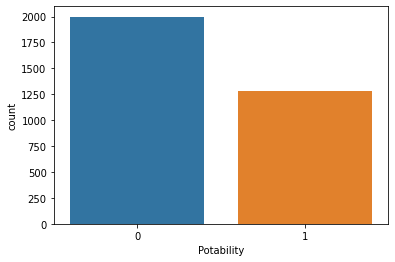

In [7]:
sns.countplot(x='Potability',data=data)

<AxesSubplot:xlabel='Potability', ylabel='ph'>

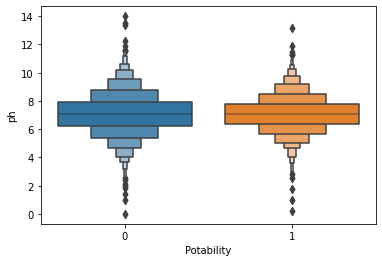

In [8]:
sns.boxenplot(x='Potability',y='ph',data=data)

<AxesSubplot:xlabel='Potability', ylabel='Sulfate'>

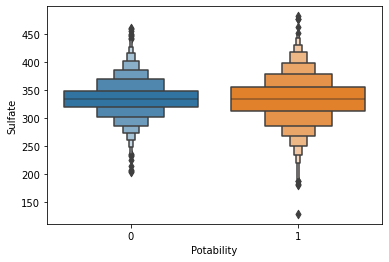

In [9]:
sns.boxenplot(x='Potability',y='Sulfate',data=data)

<AxesSubplot:xlabel='Potability', ylabel='Turbidity'>

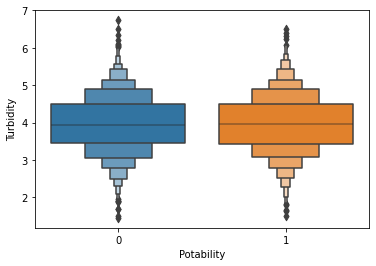

In [10]:
sns.boxenplot(x='Potability',y='Turbidity',data=data)

<AxesSubplot:xlabel='Potability', ylabel='Solids'>

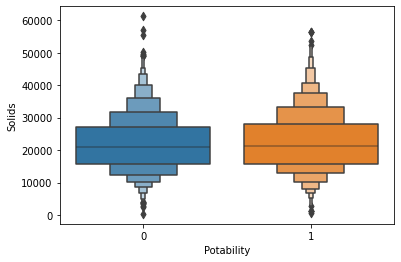

In [11]:
sns.boxenplot(x='Potability',y='Solids',data=data) 

<AxesSubplot:xlabel='Potability', ylabel='Chloramines'>

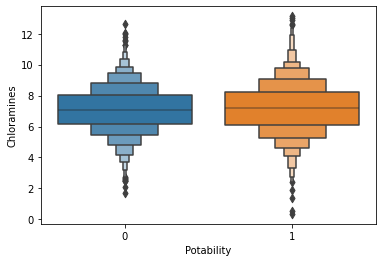

In [12]:
sns.boxenplot(x='Potability',y='Chloramines',data=data) 

<AxesSubplot:xlabel='Potability', ylabel='Chloramines'>

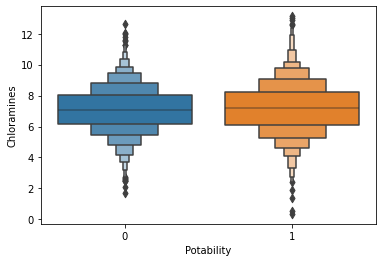

In [13]:
sns.boxenplot(x='Potability',y='Chloramines',data=data) 

<AxesSubplot:xlabel='Potability', ylabel='Conductivity'>

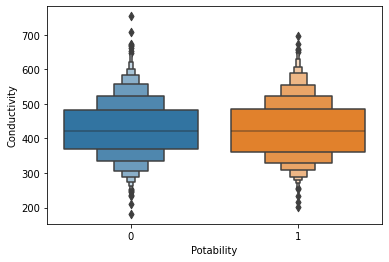

In [14]:
sns.boxenplot(x='Potability',y='Conductivity',data=data) 

<AxesSubplot:xlabel='Potability', ylabel='Organic_carbon'>

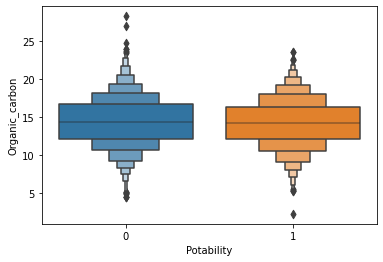

In [15]:
sns.boxenplot(x='Potability',y='Organic_carbon',data=data)

<AxesSubplot:xlabel='Potability', ylabel='Trihalomethanes'>

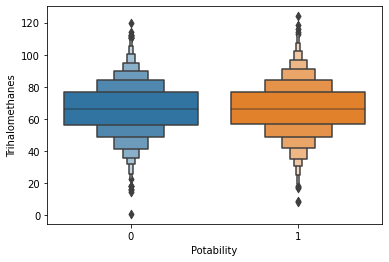

In [16]:
sns.boxenplot(x='Potability',y='Trihalomethanes',data=data)

<AxesSubplot:xlabel='Potability', ylabel='Hardness'>

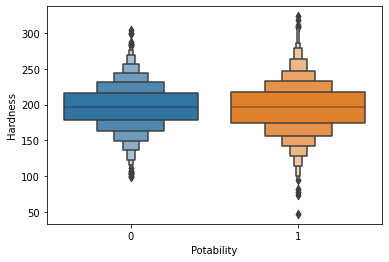

In [17]:
sns.boxenplot(x='Potability',y='Hardness',data=data)

<AxesSubplot:xlabel='Potability', ylabel='ph'>

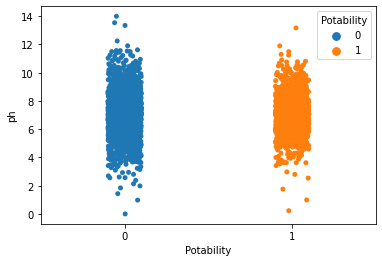

In [18]:
sns.stripplot(y='ph',x='Potability',hue ='Potability',data=data)

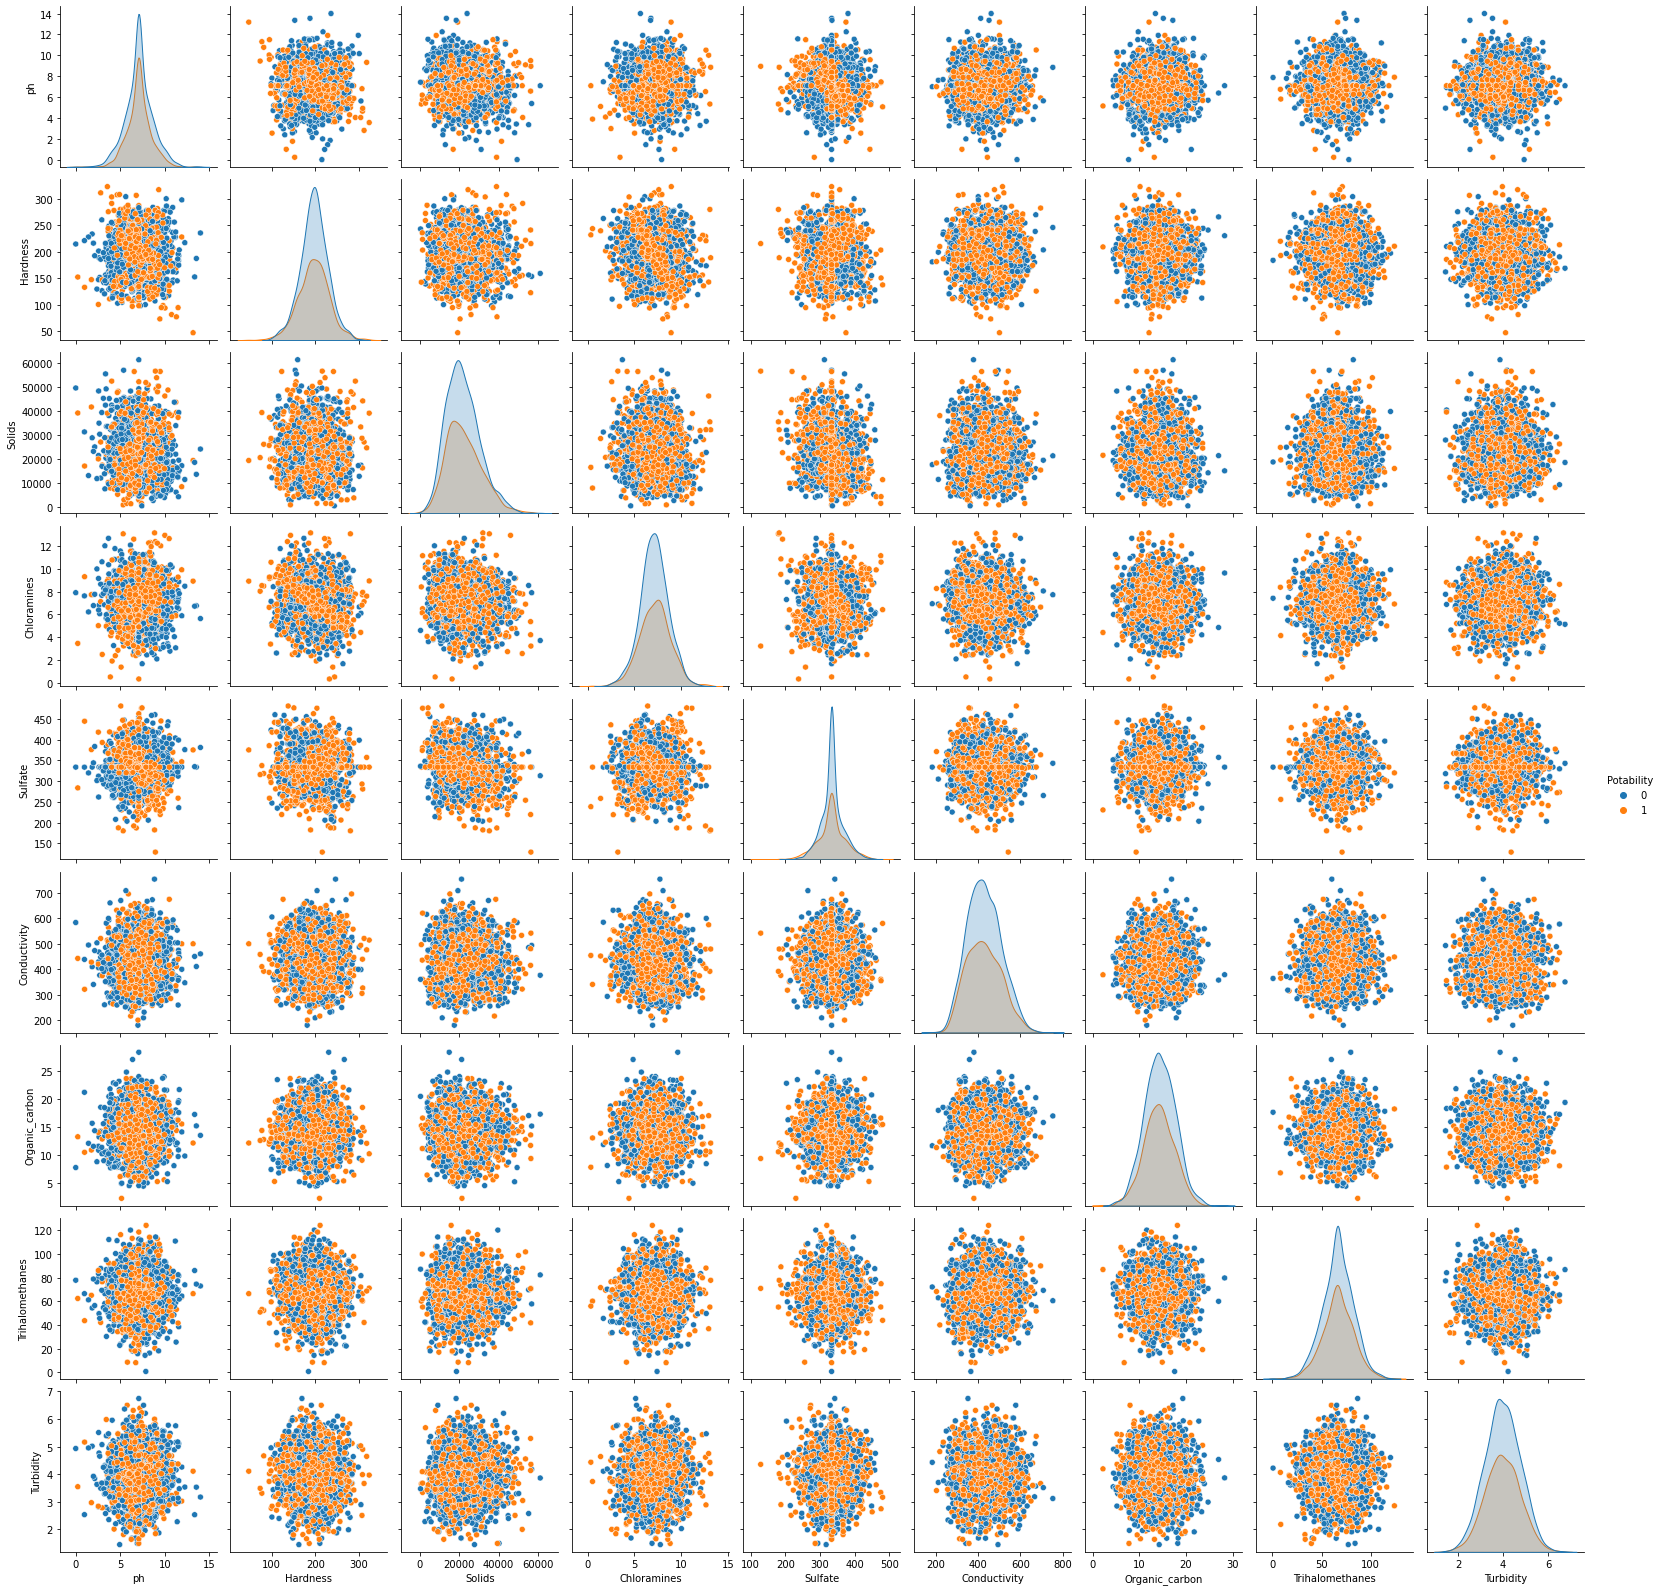

In [19]:
sns.pairplot(data=data,hue="Potability")

  0%|          | 0/9 [00:00<?, ?it/s]

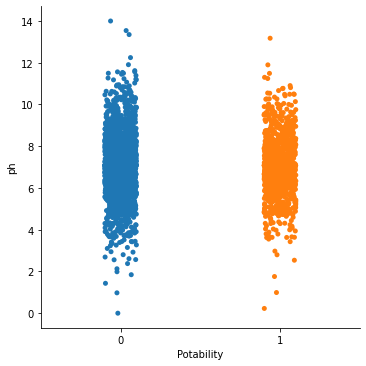

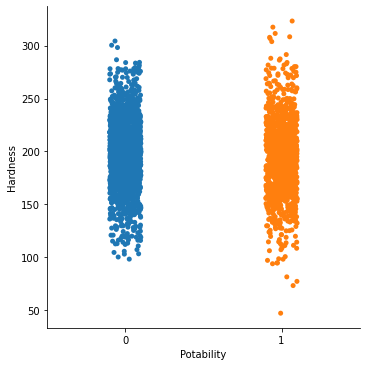

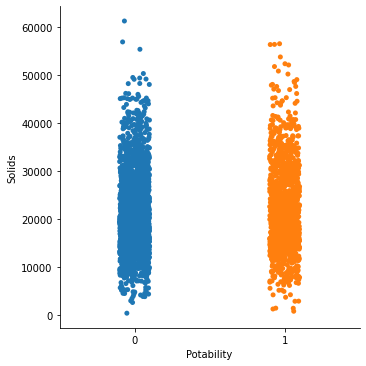

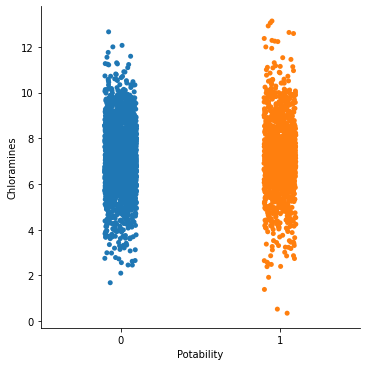

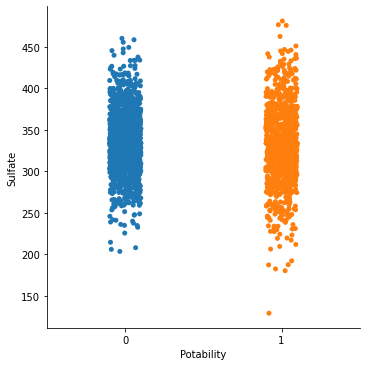

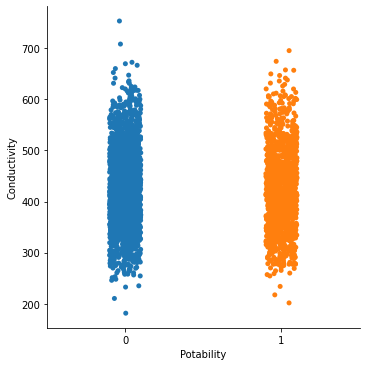

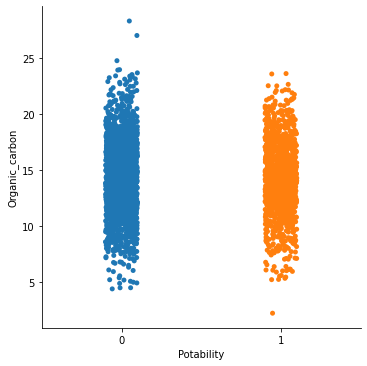

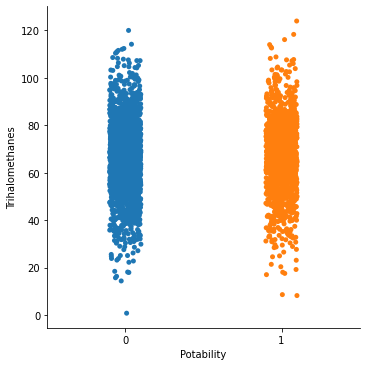

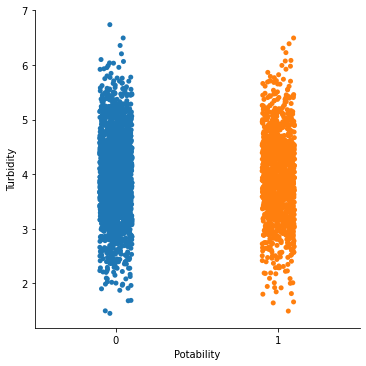

In [20]:
cols = ['ph','Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon'
        ,'Trihalomethanes', 'Turbidity']
def boxplot(data,columnName):
    sns.catplot(x='Potability',y=columnName,data=data)
for coulmns in tqdm(cols):
    boxplot(data,coulmns)   

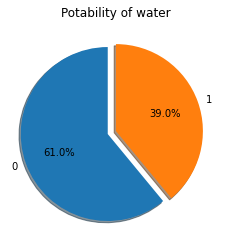

In [21]:
plt.pie(x=data['Potability'].value_counts(),explode=(0.1,0)
        ,shadow=True, startangle=90
        ,labels=['0','1'],autopct='%1.1f%%')
plt.title('Potability of water')
plt.show()

**Split and Scaling data**

In [22]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_scaling = StandardScaler().fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_scaling, y
                                                    , test_size=0.33)

**Creating Logistic Regrssion Model**

In [23]:
lg = LogisticRegression().fit(x_train,y_train)
y_pred_lg = lg.predict(x_test)
score_test = accuracy_score(y_test,y_pred_lg)*100
print('acc lg = {}'.format(score_test))

acc lg = 58.8724584103512


In [24]:
print(classification_report(y_test,y_pred_lg))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       637
           1       0.00      0.00      0.00       445

    accuracy                           0.59      1082
   macro avg       0.29      0.50      0.37      1082
weighted avg       0.35      0.59      0.44      1082



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

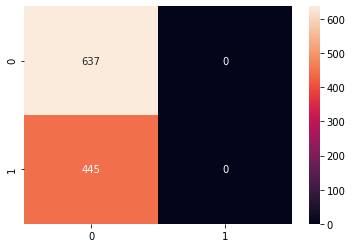

In [25]:
conf = confusion_matrix(y_test,y_pred_lg)
sns.heatmap(conf,annot=True,fmt='d')

**Creating GaussianNB Model**

In [26]:
GN = GaussianNB().fit(x_train,y_train)
y_pred_GN = GN.predict(x_test)
print('acc GN = {}'.format(accuracy_score(y_test,y_pred_GN)*100))

acc GN = 59.79667282809612


In [27]:
print(classification_report(y_test,y_pred_lg))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       637
           1       0.00      0.00      0.00       445

    accuracy                           0.59      1082
   macro avg       0.29      0.50      0.37      1082
weighted avg       0.35      0.59      0.44      1082



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

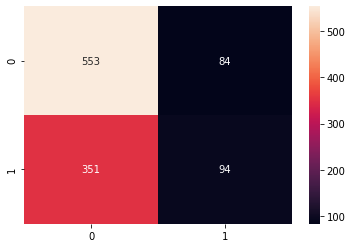

In [28]:
conf = confusion_matrix(y_test,y_pred_GN)
sns.heatmap(conf,annot=True,fmt='d')

**Creating SVC Model**

kernel(linear)

In [29]:
svc_linear = SVC(kernel='linear').fit(x_train,y_train)
y_pred_svc_linear = svc_linear.predict(x_test)
print('acc svc linear = {}'.format(accuracy_score(y_test,y_pred_svc_linear)*100))

acc svc linear = 58.8724584103512


<AxesSubplot:>

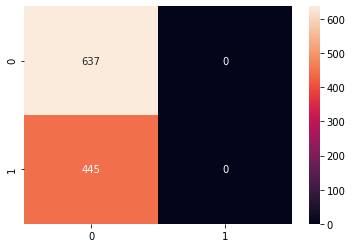

In [30]:
conf = confusion_matrix(y_test,y_pred_svc_linear)
sns.heatmap(conf,annot=True,fmt='d')

**Creating SVC Model**

kernel(rbf)

In [31]:
svc_rbf = SVC(kernel='rbf').fit(x_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(x_test)
print('acc svc rbf = {}'.format(accuracy_score(y_test,y_pred_svc_rbf)*100))

acc svc rbf = 67.28280961182995


<AxesSubplot:>

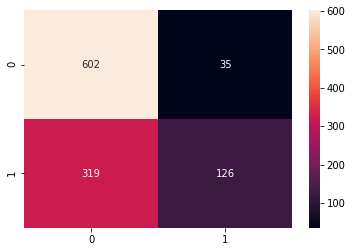

In [32]:
conf = confusion_matrix(y_test,y_pred_svc_rbf)
sns.heatmap(conf,annot=True,fmt='d')

**Creating SVC Model**

kernel(poly)

In [33]:
svc_poly = SVC(kernel='poly',degree=6).fit(x_train,y_train)
y_pred_svc_poly = svc_poly.predict(x_test)
print('acc svc poly = {}'.format(accuracy_score(y_test,y_pred_svc_poly)*100))

acc svc poly = 64.14048059149722


<AxesSubplot:>

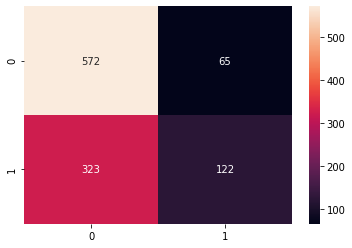

In [34]:
conf = confusion_matrix(y_test,y_pred_svc_poly)
sns.heatmap(conf,annot=True,fmt='d')

**Creating DecisionTreeClassifier Model**

In [35]:
dt = DecisionTreeClassifier(max_leaf_nodes=6).fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print('acc DT = {}'.format(accuracy_score(y_test,y_pred_dt)*100))

acc DT = 61.737523105360445


<AxesSubplot:>

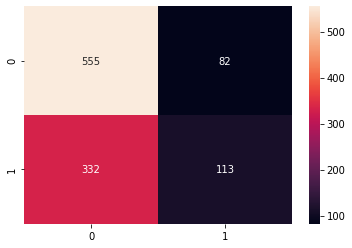

In [36]:
conf = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(conf,annot=True,fmt='d')

In [37]:
export_graphviz(dt, out_file ='tree.dot',
               feature_names =cols)

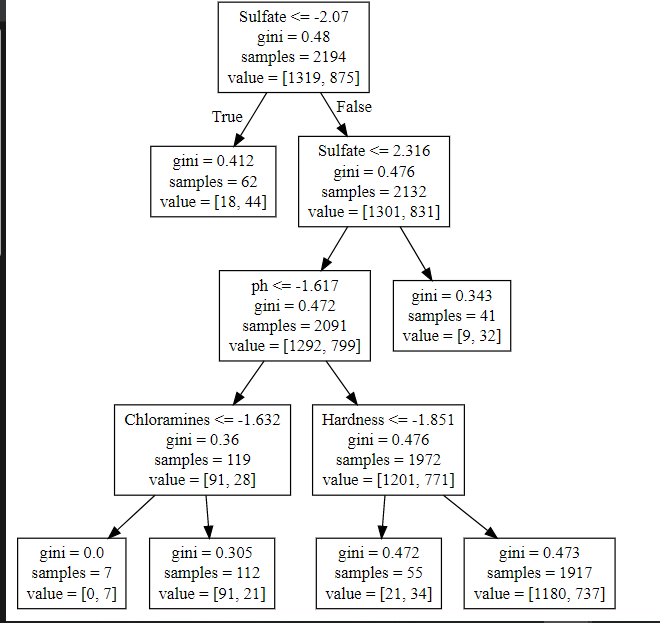

**Creating RandomForestClassifier Model**

In [38]:
rf = RandomForestClassifier(max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf = rf.predict(x_test) 
print('acc rf = {}'.format(accuracy_score(y_test,y_pred_rf)*100))

acc rf = 64.14048059149722


<AxesSubplot:>

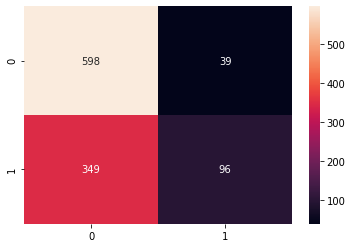

In [39]:
conf = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(conf,annot=True,fmt='d')

**Creating KNeighborsClassifier Model**

In [40]:
nc = KNeighborsClassifier(n_neighbors=8).fit(x_train,y_train)
y_pred_nc = nc.predict(x_test)
print('acc nc = {}'.format(accuracy_score(y_test,y_pred_nc)*100))

acc nc = 62.661737523105366


<AxesSubplot:>

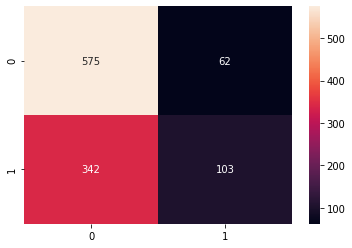

In [41]:
conf = confusion_matrix(y_test,y_pred_nc)
sns.heatmap(conf,annot=True,fmt='d')